In [33]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [42]:
poke_stats = ['HP', "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

#drop unecessary information

In [43]:
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Generation', "Legendary"])
poke_df.head()

KeyError: "['#' 'Name' 'Type 1' 'Type 2' 'Generation' 'Legendary'] not found in axis"

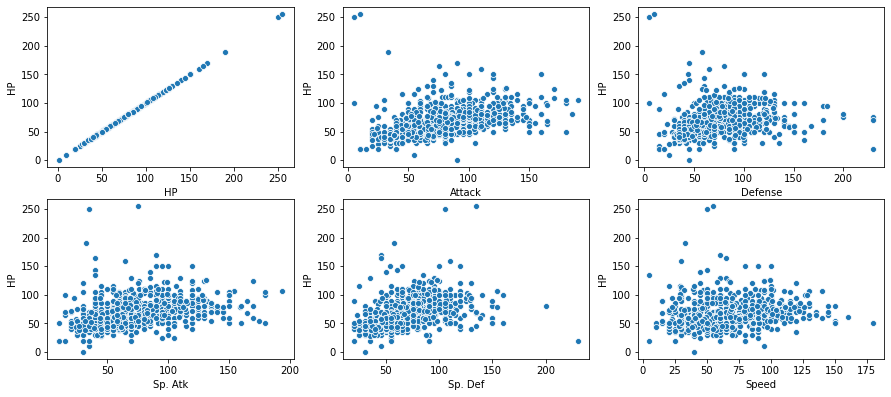

In [44]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [45]:
#preprocessing independent variables
x = poke_df.iloc[:,2:6] 
print(x)

     Attack  Defense  Sp. Atk  Sp. Def
0        49       49       65       65
1        62       63       80       80
2        82       83      100      100
3       100      123      122      120
4        52       43       60       50
..      ...      ...      ...      ...
795     100      150      100      150
796     160      110      160      110
797     110       60      150      130
798     160       60      170      130
799     110      120      130       90

[800 rows x 4 columns]


In [46]:
#preprocessing dependent variables
y = poke_df.iloc[:,1]
print (y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [10]:
linreg = LinearRegression()

linreg.fit(x,y)

LinearRegression()

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y) #fits a linear model

In [13]:
#make predictions
predictions = lm.predict(x)
print(predictions)

[ 60.52625937  68.03948387  78.67023774  87.18377202  57.3446795
  64.82673068  76.04511023  87.141167    93.12639775  57.63323934
  65.88520077  77.91043478  87.71098063  41.05245588  38.34566384
  65.16688838  42.84061606  40.13382401  75.34226458  89.73297103
  49.87693184  57.84999724  68.48075111  75.08796936  52.64712046
  68.72452308  53.438956    68.95938152  59.24921555  72.53765788
  57.76465818  77.00327714  51.84645743  65.13489977  51.12115998
  59.09422539  75.23884933  54.86776244  62.67054573  76.67912681
  59.1949778   73.13633756  58.13322491  76.47587721  49.44371009
  63.71152856  51.37065855  69.97447782  60.94082143  67.19294798
  75.81893081  61.64292846  74.27845338  57.65481035  68.37081725
  56.66791775  69.30344266  52.02357597  65.31201831  57.24543294
  73.19156374  62.62878166  75.91722399  62.73215243  80.97748774
  52.96032559  58.36104158  76.44321525  55.34152628  63.31459168
  74.07661736  74.98546594  58.56270554  70.26148084  85.53657648
  59.368097

In [17]:
lm.score(x,y) #returns R2 score, percentage of explained variance
lm.coef_ #returns m
lm.intercept_ #returns intercept

28.97390806246264

In [21]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

In [49]:
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)


[ 0.24723282 -0.11178312  0.07431177  0.31175748]
30.251996526374995


In [50]:
print(model.intercept_)

30.251996526374995


In [51]:
pd.DataFrame(model.coef_, x.columns, columns = ["Coeff"])

,Coeff
Attack,0.247233
Defense,-0.111783
Sp. Atk,0.074312
Sp. Def,0.311757


In [52]:
predictions = model.predict(x_test) #holds predicted variables fr/ x_test

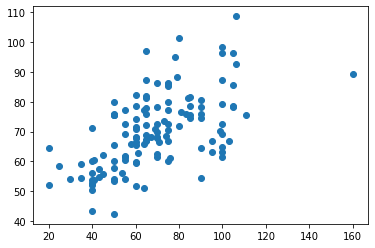

In [53]:
plt.scatter(y_test, predictions) #compare with y_test REAL values

(array([ 2., 13., 32., 33., 26.,  7., 11.,  3.,  0.,  1.]),
 array([-44.66257363, -33.12684544, -21.59111726, -10.05538907,
          1.48033912,  13.01606731,  24.5517955 ,  36.08752369,
         47.62325187,  59.15898006,  70.69470825]),
 <a list of 10 Patch objects>)

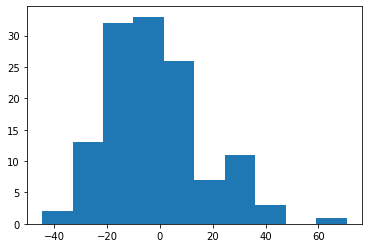

In [54]:
#plot residuals, difference between y-values
plt.hist(y_test- predictions)

In [55]:
from sklearn import metrics
#calculating error
metrics.mean_absolute_error(y_test, predictions)

14.15809390323045

In [58]:
metrics.mean_squared_error(y_test,predictions)


333.184001491408

In [60]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) #root mse

18.253328504451126